In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3

import seaborn as sns
sns.set()
%matplotlib inline
pd.options.mode.chained_assignment = None

/Users/alirezafaghaninia/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/alirezafaghaninia/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# user inputs:
SEED = 13
np.random.seed(SEED)
KEEP_ROWS_FRAC = 1.0 # set to 1 if all rows are meant to be kept
skiprows_func = lambda i: i>0 and np.random.rand() > KEEP_ROWS_FRAC

In [3]:
periods_aggregate = pd.read_csv('data/periods_aggregate_features.csv', skiprows=skiprows_func)

In [4]:
all_samples = pd.read_csv('data/all_samples_no_nulls.csv', 
                          usecols=['item_id', 'activation_date', 'city', 'region',
                              'parent_category_name', 'category_name', 
                             'item_seq_number', 'user_type', 'price_norm'], skiprows=skiprows_func)

In [5]:
used_cols = ['item_id', 'user_id', 'activation_date']

train = pd.read_csv('data/train.csv', usecols=used_cols+['deal_probability'])
train_active = pd.read_csv('data/train_active.csv', usecols=used_cols)
test = pd.read_csv('data/test.csv', usecols=used_cols)
test_active = pd.read_csv('data/test_active.csv', usecols=used_cols)

train_periods = pd.read_csv('data/periods_train.csv', parse_dates=['date_from', 'date_to'])
test_periods = pd.read_csv('data/periods_test.csv', parse_dates=['date_from', 'date_to'])

In [6]:
train_periods.iloc[:2]

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18


In [7]:
periods_aggregate.head()

,user_id,days_to_publish,days_online,activation_date_isholiday,activation_date_wday,activation_date_yday,date_from_isholiday,date_from_wday,date_from_yday,date_to_isholiday,...,median_date_to_isholiday,median_date_to_wday,median_date_to_yday,start_date_isholiday,start_date_wday,start_date_yday,end_date_isholiday,end_date_wday,end_date_yday,nitems
0,00000077ff21,0.000,8.50,0.0,3.000,78.50,0.0,3.0,78.500,0.0,...,0.0,1.750,96.5000,0.0,3.0,78.5,0.0,2.500,106.0,2
1,000006497719,8.000,13.00,0.0,1.000,66.00,0.0,2.0,74.000,0.0,...,0.0,1.000,97.5000,0.0,2.0,74.0,0.0,1.000,108.0,1
2,00000b4d72f6,0.000,3.00,0.0,5.000,105.00,0.0,5.0,105.000,0.0,...,0.0,1.000,108.0000,0.0,5.0,105.0,0.0,1.000,108.0,1
3,00000d642d7e,14.000,13.00,0.0,2.000,60.00,0.0,2.0,74.000,0.0,...,0.0,1.000,87.0000,0.0,2.0,74.0,0.0,1.000,87.0,2
4,0000126b80a4,2.625,8.25,0.0,3.875,80.25,0.0,3.0,82.875,0.0,...,0.0,1.875,94.8125,0.0,2.0,81.0,0.0,1.625,99.0,8


In [8]:
set_train_active = set(train_active['item_id'])
set_train_periods = set(train_periods['item_id'])
set_test_active = set(test_active['item_id'])
set_test_periods = set(train_periods['item_id'])
set_train = set(train['item_id'])
set_test = set(test['item_id'])

In [9]:
def empty_text_func(x):
    return ''
fontdict = {'fontsize': 17,
           'color': 'w',
           'backgroundcolor': 'k',
           'weight': 'bold',
           'style': 'italic'}

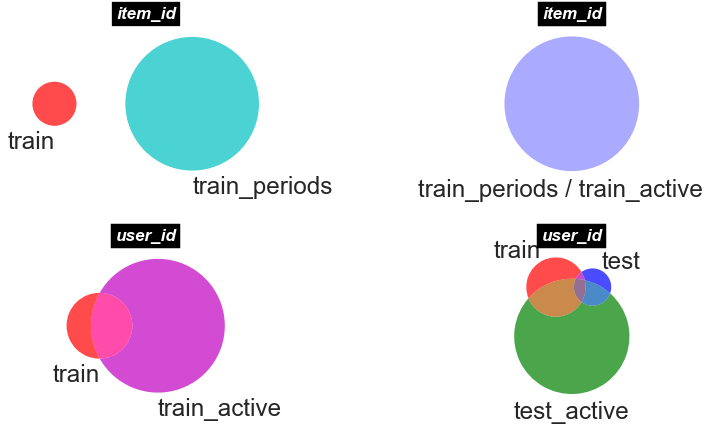

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
plt.subplots_adjust(hspace=0.4)
colors = {'train': 'r', 'test': 'b', 'train_active': 'm', 'train_periods': 'c', 'test_active': 'g'}
axes[0, 0].set_title('item_id', fontdict=fontdict)
# sns.reset_orig()
# sns.reset_defaults()
import seaborn as sns
sns.set_context("poster", font_scale=1.05)
v1 = venn2([set_train, set_train_periods], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'train_periods'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['train_periods']), ax=axes[0, 0]);

axes[0, 1].set_title('item_id', fontdict=fontdict)
v2 = venn2([set_train_periods, set_train_active], subset_label_formatter=empty_text_func,
     set_labels= ['train_periods /', ' train_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train_periods'], colors['train_active']), ax=axes[0, 1]);

axes[1, 0].set_title('user_id', fontdict=fontdict)
v3 = venn2([set(train['user_id']), set(train_active['user_id'])], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'train_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['train_active']), ax=axes[1, 0]);

axes[1, 1].set_title('user_id', fontdict=fontdict)
v4 = venn3([set(train['user_id']), set(test['user_id']), set(test_active['user_id'])], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'test', 'test_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['test'], colors['test_active']), ax=axes[1, 1]);

In [11]:
df = train.merge(periods_aggregate, how='left', on='user_id')

In [12]:
df = df.dropna()

In [13]:
# ea.get_feature_importance(sort=True)
# OrderedDict([('activation_date_yday', 0.4039770787665535),
#              ('nlisted', 0.0916081753479928),
#              ('activation_date_isholiday', 0.055421559939924925),
#              ('median_date_to_yday', 0.05439734989943655),
#              ('sum_days_online', 0.0493175445719399),

In [14]:
df['activation_date_yday'] = df['activation_date_yday'].apply(round).astype(int)
df['nlisted'] = df['nlisted'].apply(round).astype(int)

In [15]:
#  Category price box plots
# df.plot(kind='scatter', x='activation_date_yday', y='deal_probability')
mean_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday').mean().reset_index()
median_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday').median().reset_index()
third_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday').quantile(0.75).reset_index()

In [17]:
df['activation_date'] = pd.to_datetime(df['activation_date'], format='%Y-%m-%d')

In [25]:
temp = df[['activation_date', 'activation_date_yday']].set_index('activation_date').resample('D').count()

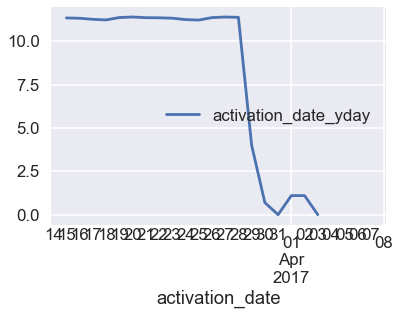

In [28]:
temp.apply(np.log).plot()

In [36]:
temp = df[['activation_date', 'deal_probability']].set_index('activation_date').resample('D').mean()

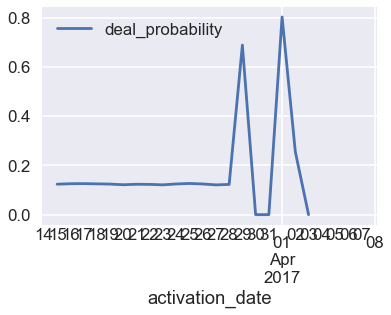

In [37]:
temp.plot()

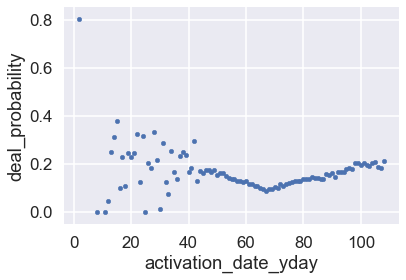

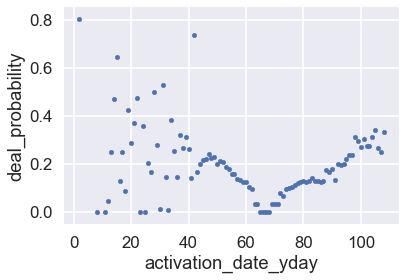

In [24]:
mean_act.plot(kind='scatter', x='activation_date_yday', y='deal_probability')
third_act.plot(kind='scatter', x='activation_date_yday', y='deal_probability')


In [ ]:
mean_nlisted = df[['nlisted', 'deal_probability']].groupby('nlisted').mean().reset_index()

In [ ]:
mean_nlisted.plot(kind='scatter', x='nlisted', y='deal_probability')

In [ ]:
df.plot(kind='scatter', x='nlisted', y='deal_probability')

In [ ]:
#  Category price box plots
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.violinplot(x='nlisted', y='deal_probability', data=df, palette="RdBu")
g.set_xlabel('The Deal Probability vs. number of times items are listed',fontsize=12)
g.set_ylabel('Deal Probability',fontsize=12)
plt.show()

In [ ]:
len(test_active['user_id'].unique())

In [ ]:
len(train_active)

In [ ]:
len(test_active)

In [ ]:
len(train_periods)

In [ ]:
len(test_periods)